In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
path = 'LogiReg_data.txt'
pdData = pd.read_csv(path,header=None,names=['Exam 1','Exam 2','Admitted']) #自定义列值
pdData.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [6]:
pdData.shape

(100, 3)

Text(0.5, 0, 'Exam 2 Score')

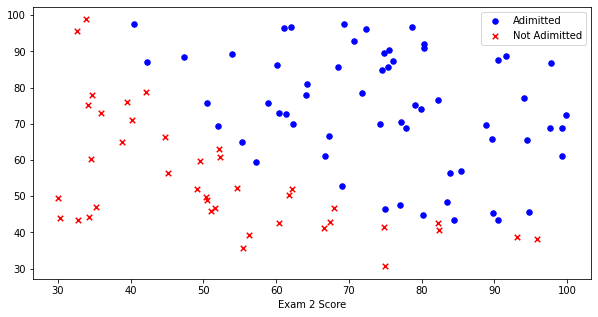

In [8]:
positive = pdData[pdData['Admitted'] == 1]
negative = pdData[pdData['Admitted'] == 0]

fig,ax = plt.subplots(figsize=(10,5))
ax.scatter(positive['Exam 1'],positive['Exam 2'],s=30,c='b',marker='o',label='Adimitted')
ax.scatter(negative['Exam 1'],negative['Exam 2'],s=30,c='r',marker='x',label='Not Adimitted')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_xlabel('Exam 2 Score')

# The logistic regression

## 要完成的模块

- sigmoid:映射到概率的函数
- model:返回预测结果值
- cost:根据参数计算损失
- gradient:计算每个参数的梯度方向
- descent:进行参数更新
- accuracy:计算精度

In [10]:
def sigmoid(z):
    return 1 / (1+np.exp(-z))

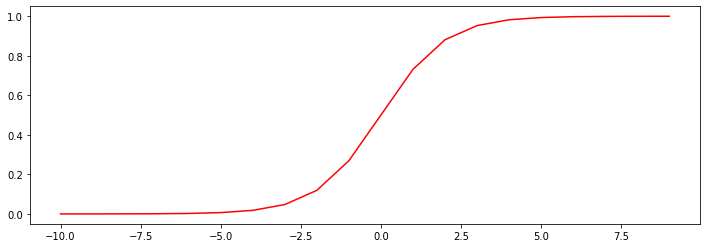

In [12]:
nums = np.arange(-10,10,step=1)
fig,ax = plt.subplots(figsize=(12,4))
ax.plot(nums,sigmoid(nums),'r')

In [13]:
def model(X,theta):
    return sigmoid(np.dot(X,theta.T))

In [17]:
#pdData.insert(0,'Ones',1)
orig_data = pdData.iloc[:,:].values
cols = orig_data.shape[1]
X = orig_data[:,0:cols-1]
y = orig_data[:,cols-1:cols]
theta = np.zeros([1,3])

In [18]:
X[:5]

array([[ 1.        , 34.62365962, 78.02469282],
       [ 1.        , 30.28671077, 43.89499752],
       [ 1.        , 35.84740877, 72.90219803],
       [ 1.        , 60.18259939, 86.3085521 ],
       [ 1.        , 79.03273605, 75.34437644]])

In [19]:
y[:5]

array([[0.],
       [0.],
       [0.],
       [1.],
       [1.]])

In [20]:
theta

array([[0., 0., 0.]])

In [21]:
X.shape,y.shape,theta.shape

((100, 3), (100, 1), (1, 3))

In [22]:
def cost(X,y,theta):
    left = np.multiply(-y,np.log(model(X,theta)))
    right = np.multiply(1-y,np.log(1-model(X,theta)))
    return np.sum(left-right) / (len(X))

In [23]:
cost(X,y,theta)

0.6931471805599453

In [24]:
def gradient(X,y,theta):
    grad = np.zeros(theta.shape)
    error = (model(X,theta)-y).ravel()
    for j in range(len(theta.ravel())):
        term = np.multiply(error,X[:,j])
        grad[0,j] = np.sum(term) / len(X)
    return grad

In [25]:
STOP_ITER = 0
STOP_COST = 1
STOP_GRAD = 2

def stopCriterion(type,value,threshold):
    if type == STOP_ITER: return value > threshold
    elif type == STOP_COST: return abs(value[-1]-value[-2]) < threshold
    elif type == STOP_GRAD: return np.linalg.norm(value) < threshold

In [26]:
import numpy.random
def shuffleData(data):
    np.random.shuffle(data)
    cols = data.shape[1]
    X = data[:,0:cols-1]
    y = data[:,cols-1:]
    return X,y

In [31]:
import time
def descent(data,theta,batchSize,stopType,thresh,alpha):
    init_time = time.time()
    i = 0
    k = 0
    X,y = shuffleData(data)
    grad = np.zeros(theta.shape)
    costs = [cost(X,y,theta)]
    
    while True:
        grad = gradient(X[k:k+batchSize],y[k:k+batchSize],theta)
        k+=batchSize
        if k >= n:
            k=0
            X,y = shuffleData(data)
            
        theta = theta-alpha*grad
        costs.append(cost(X,y,theta))
        i+=1
        
        if stopType == STOP_ITER: value = i
        elif stopType == STOP_COST: value = costs
        elif stopType == STOP_GRAD: value = grad
        if stopCriterion(stopType,value,thresh): break
    
    return theta,i-1,costs,grad,time.time()-init_time

In [32]:
def runExpe(data,theta,batchSize,stopType,thresh,alpha):
    theta,iter,costs,grad,dur = descent(data,theta,batchSize,stopType,thresh,alpha)
    name = 'Original' if (data[:,1]>2).sum() > 1 else 'Scaled'
    name += 'data - learning rate: {} - '.format(alpha)
    if batchSize==n: strDesctype = 'Gradient'
    elif batchSize==1: strDesctype = 'Stochastic'
    else: strDesctype = 'Mini-batch ({})'.format(batchSize)
    name+= strDesctype+ 'descent - Stop'
    if stopType == STOP_ITER: strStop='{} iterations'.format(thresh)
    elif stopType == STOP_COST: strStop = 'costs change < {}'.format(thresh)
    else: strStop = 'gradient norm < {}'.format(thresh)
    name+=strStop
    print('***{}\nTheta: {} - iter: {} - Last cost: {:03.2f} - Duration: {:03.2f}s'.format(
        name,theta,iter,costs[-1],dur))
    fig,ax = plt.subplots(figsize=(12,4))
    ax.plot(np.arange(len(costs)),costs,'r')
    ax.set_xlabel('Iterations')
    ax.set_ylabel('Cost')
    ax.set_title(name.upper()+' - Error vs. Iteration')
    return theta

***Originaldata - learning rate: 1e-06 - Gradientdescent - Stop5000 iterations
Theta: [[-0.00027127  0.00705232  0.00376711]] - iter: 5000 - Last cost: 0.63 - Duration: 0.74s


array([[-0.00027127,  0.00705232,  0.00376711]])

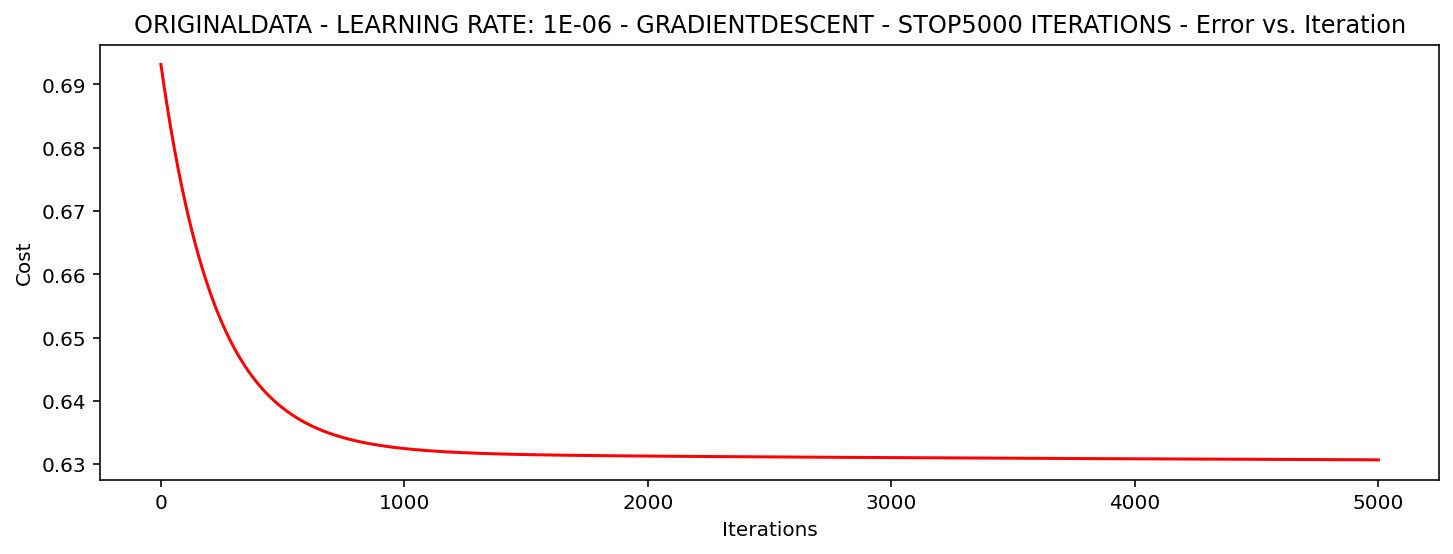

In [33]:
n=100
runExpe(orig_data,theta,n,STOP_ITER,thresh=5000,alpha=0.000001) #根据迭代次数停止

***Originaldata - learning rate: 0.001 - Gradientdescent - Stopcosts change < 1e-06
Theta: [[-5.13364014  0.04771429  0.04072397]] - iter: 109901 - Last cost: 0.38 - Duration: 16.52s


array([[-5.13364014,  0.04771429,  0.04072397]])

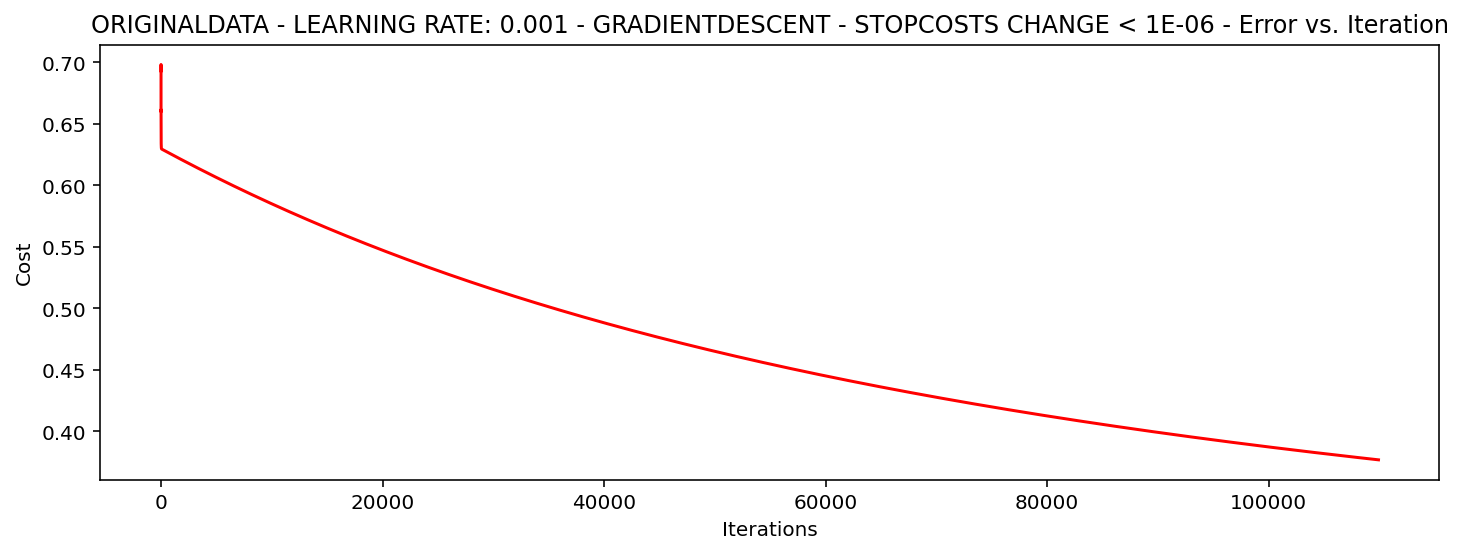

In [34]:
runExpe(orig_data,theta,n,STOP_COST,thresh=0.000001,alpha=0.001) #根据损失值停止

***Originaldata - learning rate: 0.001 - Gradientdescent - Stopgradient norm < 0.05
Theta: [[-2.37033409  0.02721692  0.01899456]] - iter: 40045 - Last cost: 0.49 - Duration: 6.50s


array([[-2.37033409,  0.02721692,  0.01899456]])

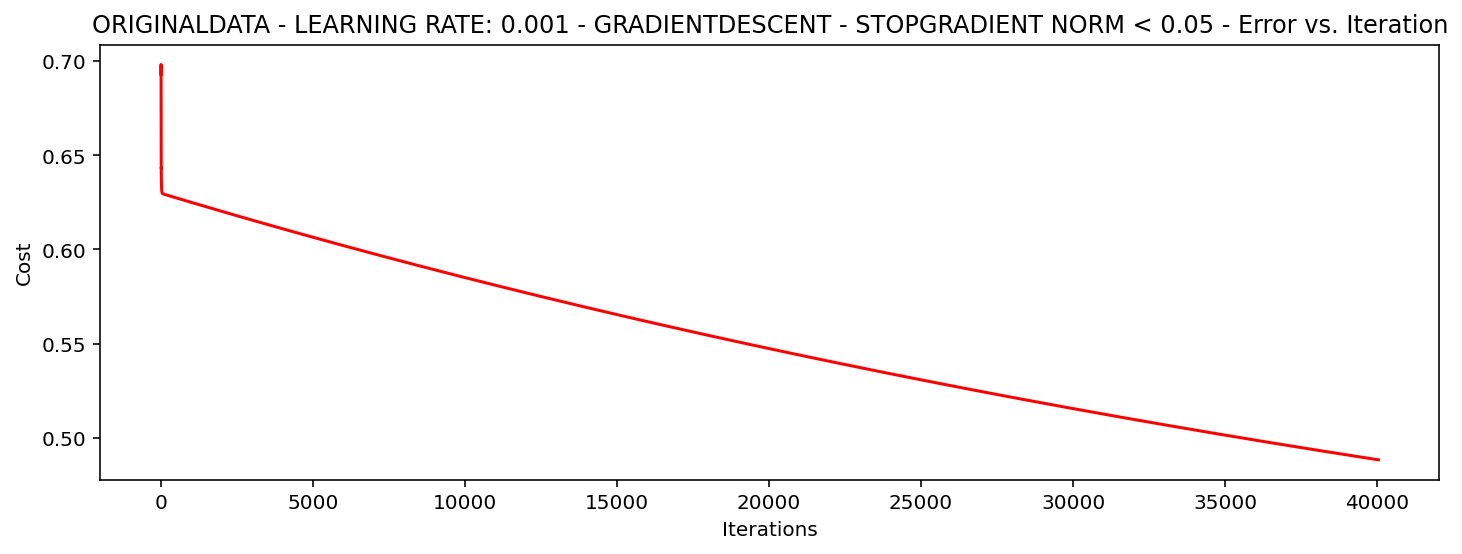

In [35]:
runExpe(orig_data,theta,n,STOP_GRAD,thresh=0.05,alpha=0.001) #根据梯度变化停止

# 对比不同梯度下降方法

### Stochastic descent

***Originaldata - learning rate: 0.001 - Stochasticdescent - Stop5000 iterations
Theta: [[-0.38877856  0.09981051  0.01888703]] - iter: 5000 - Last cost: 2.34 - Duration: 0.25s


array([[-0.38877856,  0.09981051,  0.01888703]])

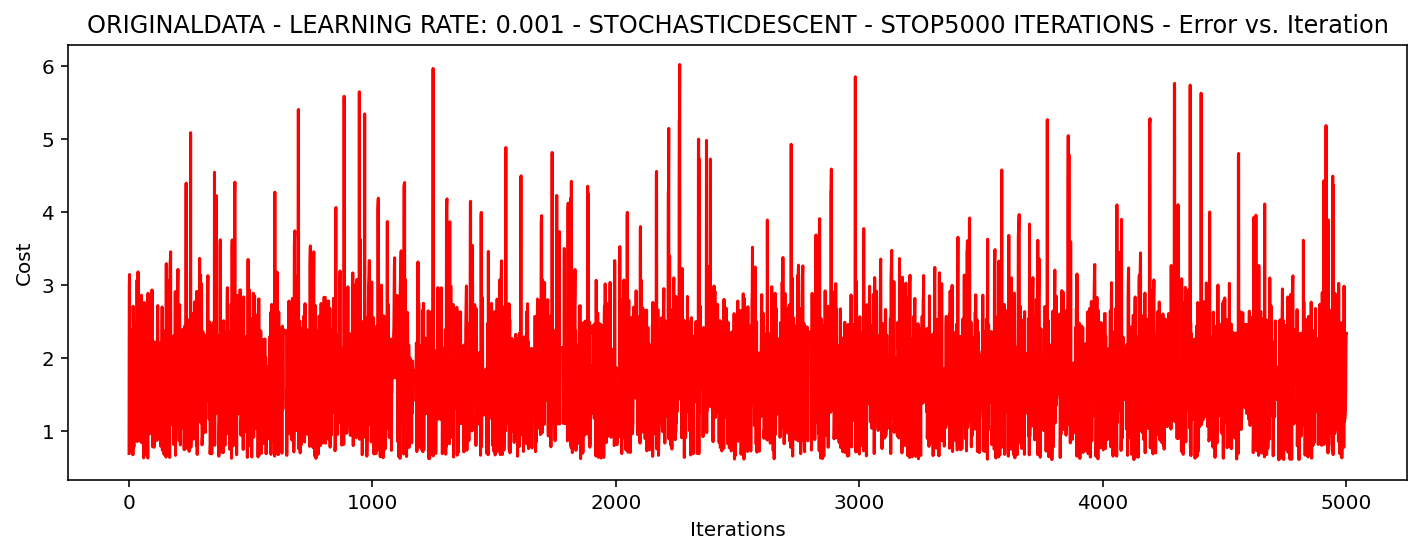

In [38]:
runExpe(orig_data,theta,1,STOP_ITER,thresh=5000,alpha=0.001) 

调小学习率

***Originaldata - learning rate: 2e-06 - Stochasticdescent - Stop15000 iterations
Theta: [[-0.00202223  0.00997812  0.00089675]] - iter: 15000 - Last cost: 0.63 - Duration: 0.81s


array([[-0.00202223,  0.00997812,  0.00089675]])

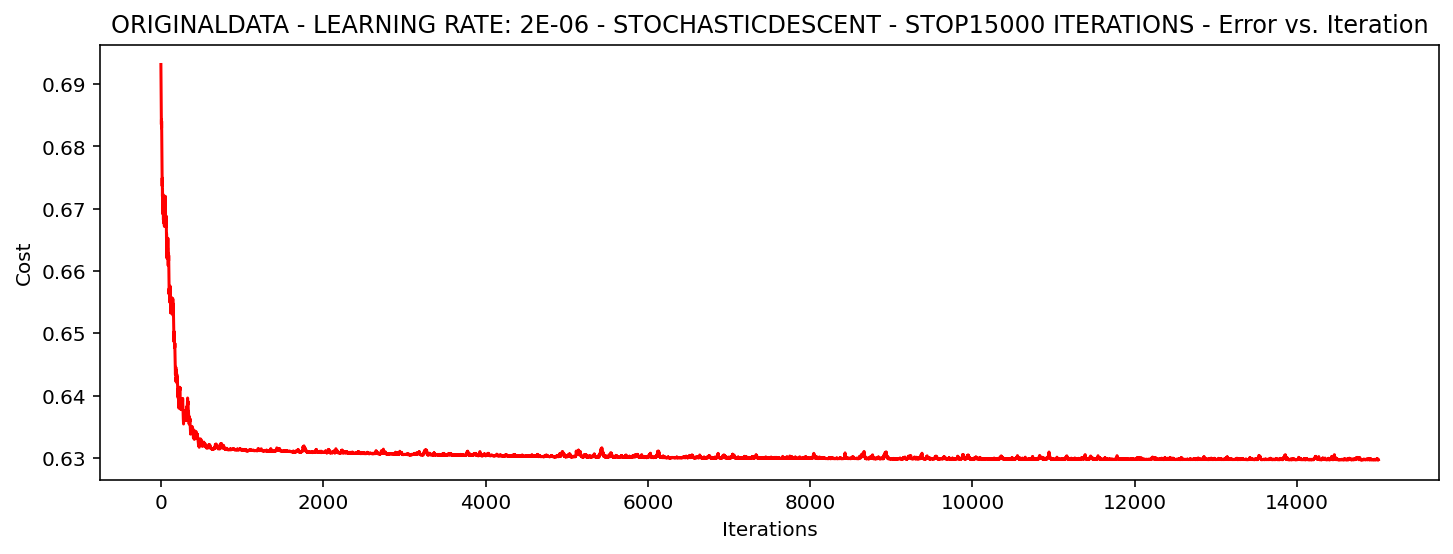

In [40]:
runExpe(orig_data,theta,1,STOP_ITER,thresh=15000,alpha=0.000002) 

###  Mini-bitch descent

***Originaldata - learning rate: 0.001 - Mini-batch (16)descent - Stop15000 iterations
Theta: [[-1.03522243  0.01656918 -0.00633387]] - iter: 15000 - Last cost: 0.70 - Duration: 1.01s


array([[-1.03522243,  0.01656918, -0.00633387]])

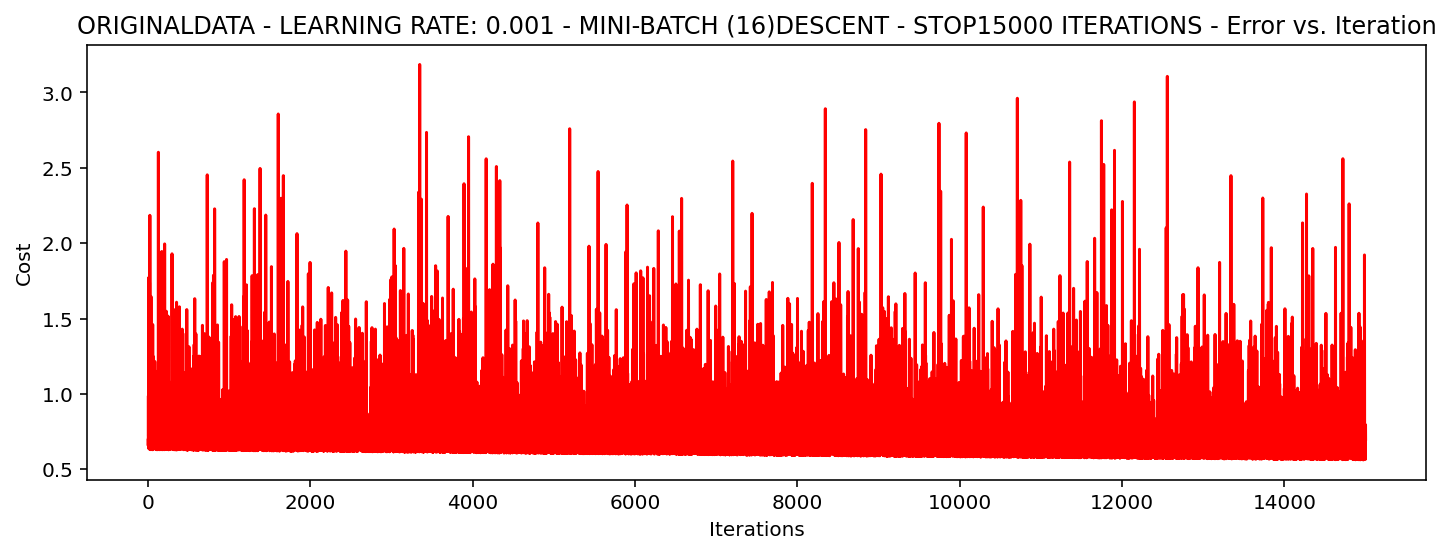

In [41]:
runExpe(orig_data,theta,16,STOP_ITER,thresh=15000,alpha=0.001) 

/Users/caoyifan/opt/anaconda3/envs/tensorflow/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


***Scaleddata - learning rate: 0.001 - Gradientdescent - Stop5000 iterations
Theta: [[0.3080807  0.86494967 0.77367651]] - iter: 5000 - Last cost: 0.38 - Duration: 0.78s


array([[0.3080807 , 0.86494967, 0.77367651]])

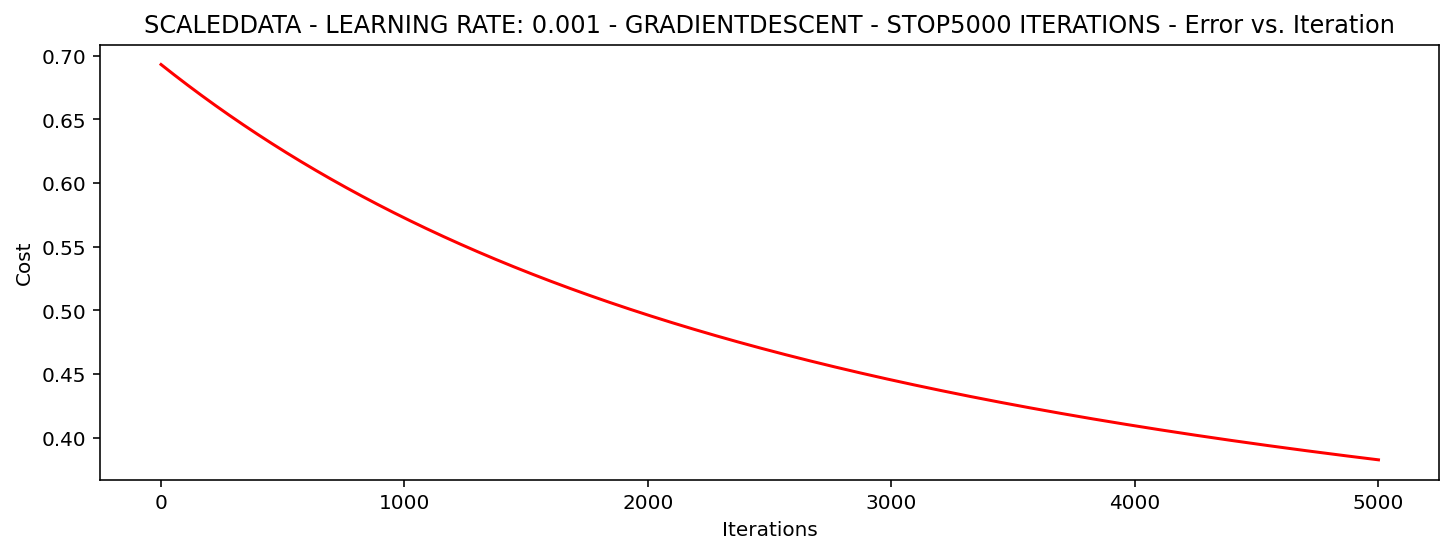

In [42]:
from sklearn import preprocessing as pp

scaled_data = orig_data.copy()
scaled_data[:,1:3] = pp.scale(orig_data[:,1:3])

runExpe(scaled_data,theta,n,STOP_ITER,thresh=5000,alpha=0.001)

***Scaleddata - learning rate: 0.001 - Mini-batch (16)descent - Stopgradient norm < 0.004
Theta: [[1.12554261 2.73316952 2.50921424]] - iter: 67612 - Last cost: 0.22 - Duration: 4.94s


array([[1.12554261, 2.73316952, 2.50921424]])

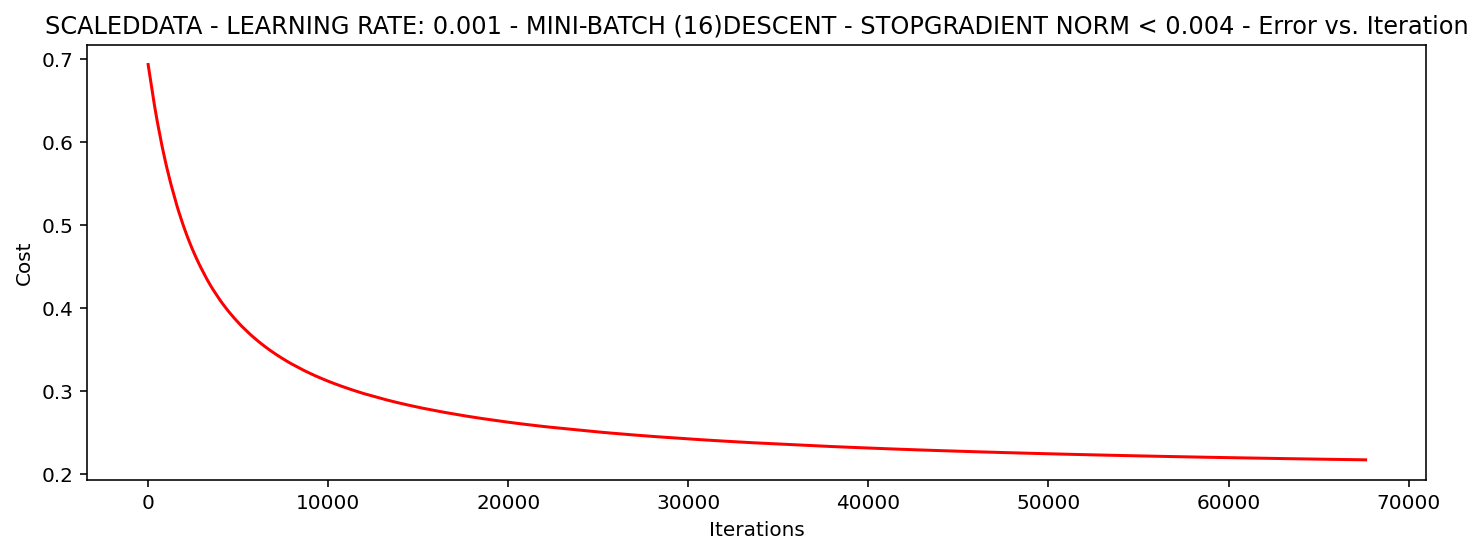

In [44]:
runExpe(scaled_data,theta,16,STOP_GRAD,thresh=0.002*2,alpha=0.001) 

In [45]:
def predict(X,theta):
    return [1 if x >= 0.5 else 0 for x in model(X,theta)]

In [46]:
scaled_X = scaled_data[:,:3]
y = scaled_data[:,3]
predictions = predict(scaled_X,theta)
correct = [1 if ((a == 1 and b ==1) or (a == 0 and b == 0)) else 0 for (a,b) in zip(predictions,y)]
accuracy = (sum(map(int,correct)) % len(correct))
print('accuracy = {0}%'.format(accuracy))

accuracy = 60%
